In [1]:
import nfl_data_py as nfl
import pandas as pd
import os
import urllib.request
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnnotationBbox
from matplotlib.offsetbox import OffsetImage
from PIL import Image
import numpy as np
from io import BytesIO
import requests
# ML Libraries
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
#import hvplot.pandas
import plotly.express as px

# Graphing 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.pyplot import figure

In [2]:
# List all available functions, classes, and objects in the library
all_objects = dir(nfl)
print(all_objects)

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'appdirs', 'cache_pbp', 'clean_nfl_data', 'datetime', 'import_combine_data', 'import_contracts', 'import_depth_charts', 'import_draft_picks', 'import_draft_values', 'import_ids', 'import_injuries', 'import_ngs_data', 'import_officials', 'import_pbp_data', 'import_pfr', 'import_players', 'import_qbr', 'import_rosters', 'import_sc_lines', 'import_schedules', 'import_seasonal_data', 'import_snap_counts', 'import_team_desc', 'import_weekly_data', 'import_win_totals', 'name', 'numpy', 'os', 'pandas', 'see_pbp_cols', 'see_weekly_cols']


In [3]:
nfl_data = nfl.import_schedules([2024])
week = nfl_data.groupby('week')
week.head()

,game_id,season,game_type,week,gameday,weekday,gametime,away_team,away_score,home_team,...,wind,away_qb_id,home_qb_id,away_qb_name,home_qb_name,away_coach,home_coach,referee,stadium_id,stadium
6706,2024_01_BAL_KC,2024,REG,1,2024-09-05,Thursday,20:20,BAL,20.0,KC,...,8.0,00-0034796,00-0033873,Lamar Jackson,Patrick Mahomes,John Harbaugh,Andy Reid,Shawn Hochuli,KAN00,GEHA Field at Arrowhead Stadium
6707,2024_01_GB_PHI,2024,REG,1,2024-09-06,Friday,20:15,GB,29.0,PHI,...,NaN,00-0036264,00-0036389,Jordan Love,Jalen Hurts,Matt LaFleur,Nick Sirianni,Ron Torbert,SAO00,Arena Corinthians
6708,2024_01_PIT_ATL,2024,REG,1,2024-09-08,Sunday,13:00,PIT,18.0,ATL,...,NaN,00-0036945,00-0029604,Justin Fields,Kirk Cousins,Mike Tomlin,Raheem Morris,Brad Rogers,ATL97,Mercedes-Benz Stadium
6709,2024_01_ARI_BUF,2024,REG,1,2024-09-08,Sunday,13:00,ARI,28.0,BUF,...,20.0,00-0035228,00-0034857,Kyler Murray,Josh Allen,Jonathan Gannon,Sean McDermott,Tra Blake,BUF00,New Era Field
6710,2024_01_TEN_CHI,2024,REG,1,2024-09-08,Sunday,13:00,TEN,17.0,CHI,...,8.0,00-0039152,00-0039918,Will Levis,Caleb Williams,Brian Callahan,Matt Eberflus,Shawn Smith,CHI98,Soldier Field
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6962,2024_18_SF_ARI,2024,REG,18,2025-01-05,Sunday,13:00,SF,NaN,ARI,...,NaN,NaN,NaN,NaN,NaN,Kyle Shanahan,Jonathan Gannon,NaN,PHO00,State Farm Stadium
6963,2024_18_CAR_ATL,2024,REG,18,2025-01-05,Sunday,13:00,CAR,NaN,ATL,...,NaN,NaN,NaN,NaN,NaN,Dave Canales,Raheem Morris,NaN,ATL97,Mercedes-Benz Stadium
6964,2024_18_CLE_BAL,2024,REG,18,2025-01-05,Sunday,13:00,CLE,NaN,BAL,...,NaN,NaN,NaN,NaN,NaN,Kevin Stefanski,John Harbaugh,NaN,BAL00,M&T Bank Stadium
6965,2024_18_WAS_DAL,2024,REG,18,2025-01-05,Sunday,13:00,WAS,NaN,DAL,...,NaN,NaN,NaN,NaN,NaN,Dan Quinn,Mike McCarthy,NaN,DAL00,AT&T Stadium


In [6]:
qbr = nfl.import_qbr([2023])
#qbr.set_index('player_id', inplace=True)
qbr.head()

,season,season_type,game_week,team_abb,player_id,name_short,rank,qbr_total,pts_added,qb_plays,...,exp_sack,penalty,qbr_raw,sack,name_first,name_last,name_display,headshot_href,team,qualified
1281,2023,Regular,Season Total,SF,4361741,B. Purdy,1.0,72.8,37.2,530,...,0,1.0,73.0,-10.2,Brock,Purdy,Brock Purdy,https://a.espncdn.com/i/headshots/nfl/players/...,49ers,True
1282,2023,Regular,Season Total,DAL,2577417,D. Prescott,2.0,72.7,57.0,724,...,0,4.5,75.3,-16.3,Dak,Prescott,Dak Prescott,https://a.espncdn.com/i/headshots/nfl/players/...,Cowboys,True
1283,2023,Regular,Season Total,BUF,3918298,J. Allen,3.0,69.6,41.2,744,...,0,-0.1,68.6,-9.5,Josh,Allen,Josh Allen,https://a.espncdn.com/i/headshots/nfl/players/...,Bills,True
1284,2023,Regular,Season Total,BAL,3916387,L. Jackson,4.0,64.7,29.3,676,...,0,3.8,64.9,-14.1,Lamar,Jackson,Lamar Jackson,https://a.espncdn.com/i/headshots/nfl/players/...,Ravens,True
1285,2023,Regular,Season Total,LAC,4038941,J. Herbert,5.0,64.1,22.2,564,...,0,0.6,63.6,-13.1,Justin,Herbert,Justin Herbert,https://a.espncdn.com/i/headshots/nfl/players/...,Chargers,True


In [9]:
import sportsipy.nfl as nfl

print(dir(nfl))

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__']


In [5]:
weekly_nfl = nfl.import_weekly_data([2024])
weekly_nfl.dtypes

Downcasting floats.


player_id                       object
player_name                     object
player_display_name             object
position                        object
position_group                  object
headshot_url                    object
recent_team                     object
season                           int32
week                             int32
season_type                     object
opponent_team                   object
completions                      int32
attempts                         int32
passing_yards                  float32
passing_tds                      int32
interceptions                  float32
sacks                          float32
sack_yards                     float32
sack_fumbles                     int32
sack_fumbles_lost                int32
passing_air_yards              float32
passing_yards_after_catch      float32
passing_first_downs            float32
passing_epa                    float32
passing_2pt_conversions          int32
pacr                     

In [6]:
weekly_nfl

,player_id,player_name,player_display_name,position,position_group,headshot_url,recent_team,season,week,season_type,...,receiving_first_downs,receiving_epa,receiving_2pt_conversions,racr,target_share,air_yards_share,wopr,special_teams_tds,fantasy_points,fantasy_points_ppr
0,00-0023459,A.Rodgers,Aaron Rodgers,QB,QB,https://static.www.nfl.com/image/upload/f_auto...,NYJ,2024,1,REG,...,0.0,NaN,0,NaN,NaN,NaN,NaN,0.0,8.580000,8.580000
1,00-0023459,A.Rodgers,Aaron Rodgers,QB,QB,https://static.www.nfl.com/image/upload/f_auto...,NYJ,2024,2,REG,...,0.0,NaN,0,NaN,NaN,NaN,NaN,0.0,15.140000,15.140000
2,00-0023459,A.Rodgers,Aaron Rodgers,QB,QB,https://static.www.nfl.com/image/upload/f_auto...,NYJ,2024,3,REG,...,0.0,NaN,0,NaN,NaN,NaN,NaN,0.0,21.040001,21.040001
3,00-0023459,A.Rodgers,Aaron Rodgers,QB,QB,https://static.www.nfl.com/image/upload/f_auto...,NYJ,2024,4,REG,...,0.0,NaN,0,NaN,NaN,NaN,NaN,0.0,11.600000,11.600000
4,00-0026158,J.Flacco,Joe Flacco,QB,QB,https://static.www.nfl.com/image/upload/f_auto...,IND,2024,4,REG,...,0.0,NaN,0,NaN,NaN,NaN,NaN,0.0,15.020000,15.020000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,00-0039920,M.Corley,Malachi Corley,WR,WR,https://static.www.nfl.com/image/upload/f_auto...,NYJ,2024,2,REG,...,0.0,-0.475780,0,0.000000,0.034483,-0.006579,0.047119,0.0,0.400000,1.400000
1230,00-0039921,T.Benson,Trey Benson,RB,RB,https://static.www.nfl.com/image/upload/f_auto...,ARI,2024,1,REG,...,0.0,-0.088616,0,-1.250000,0.032258,-0.020942,0.033727,0.0,1.800000,2.800000
1231,00-0039921,T.Benson,Trey Benson,RB,RB,https://static.www.nfl.com/image/upload/f_auto...,ARI,2024,2,REG,...,0.0,0.238474,0,-1.166667,0.047619,-0.028037,0.051802,0.0,1.700000,2.700000
1232,00-0039921,T.Benson,Trey Benson,RB,RB,https://static.www.nfl.com/image/upload/f_auto...,ARI,2024,3,REG,...,0.0,NaN,0,NaN,NaN,NaN,NaN,0.0,0.800000,0.800000


In [7]:
# Create a DF for QB's
qb_df = weekly_nfl[(weekly_nfl["position"] == "QB")]
new_columns = ['opponent_team','recent_team','week','player_display_name','fantasy_points', 'fantasy_points_ppr','passing_air_yards','completions','attempts','passing_yards','passing_tds','interceptions','sacks','sack_yards','sack_fumbles','sack_fumbles_lost','passing_air_yards','passing_yards_after_catch','passing_first_downs', 'passing_epa', 'pacr', 'rushing_yards','rushing_tds','headshot_url']
qb_df_two = qb_df[new_columns]
qb_df_two= qb_df_two[qb_df_two['fantasy_points_ppr'] != 0]
qb_df_two.head()

,opponent_team,recent_team,week,player_display_name,fantasy_points,fantasy_points_ppr,passing_air_yards,completions,attempts,passing_yards,...,sack_fumbles,sack_fumbles_lost,passing_air_yards,passing_yards_after_catch,passing_first_downs,passing_epa,pacr,rushing_yards,rushing_tds,headshot_url
0,SF,NYJ,1,Aaron Rodgers,8.580000,8.580000,164.0,13,21,167.0,...,0,0,164.0,93.0,8.0,3.258283,1.018293,-1.0,0,https://static.www.nfl.com/image/upload/f_auto...
1,TEN,NYJ,2,Aaron Rodgers,15.140000,15.140000,167.0,18,30,176.0,...,0,0,167.0,96.0,9.0,1.653769,1.053892,1.0,0,https://static.www.nfl.com/image/upload/f_auto...
2,NE,NYJ,3,Aaron Rodgers,21.040001,21.040001,226.0,27,35,281.0,...,0,0,226.0,152.0,16.0,18.204784,1.243363,18.0,0,https://static.www.nfl.com/image/upload/f_auto...
3,DEN,NYJ,4,Aaron Rodgers,11.600000,11.600000,306.0,24,42,225.0,...,0,0,306.0,96.0,10.0,-12.087543,0.735294,26.0,0,https://static.www.nfl.com/image/upload/f_auto...
4,PIT,IND,4,Joe Flacco,15.020000,15.020000,272.0,16,26,168.0,...,0,0,272.0,74.0,10.0,7.757927,0.617647,3.0,0,https://static.www.nfl.com/image/upload/f_auto...


In [8]:
# make index player_display_name
qb_df_two.set_index('player_display_name', inplace=True)


In [9]:
#create df for sum QB
qb_sum_df = qb_df_two.groupby('player_display_name').sum().reset_index()
qb_sum_df.set_index('player_display_name', inplace=True)

In [10]:
# OVR MODEL
def get_clusters(k, data):
    # Create a copy of the DataFrame
    data = data.copy()

    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Fit the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [11]:
# Create ML for traditional stats SUM
fantasy_points = qb_sum_df.groupby("player_display_name").sum()['fantasy_points']
fantasy_points_ppr = qb_sum_df.groupby("player_display_name").sum()['fantasy_points_ppr']
yards = qb_sum_df.groupby("player_display_name").sum()['passing_yards']
completions = qb_sum_df.groupby("player_display_name").sum()['completions']
attempts = qb_sum_df.groupby("player_display_name").sum()['attempts']
tds = qb_sum_df.groupby("player_display_name").sum()['passing_tds']
interceptions = qb_sum_df.groupby("player_display_name").sum()['interceptions']
sacks = qb_sum_df.groupby("player_display_name").sum()['sacks']
rushing_yards = qb_sum_df.groupby("player_display_name").sum()['rushing_yards']
rushing_tds = qb_sum_df.groupby("player_display_name").sum()['rushing_tds']



trad_ml_df = pd.DataFrame({
    "fantasy_points": fantasy_points,
    "fantasy_points_ppr": fantasy_points_ppr,
    "yards": yards,
    "completions": completions,
    "attempts": attempts,
    "tds":tds,
    "interceptions": interceptions,
    
    
})

trad_ml_df.head()

,fantasy_points,fantasy_points_ppr,yards,completions,attempts,tds,interceptions
player_display_name,,,,,,,
Aaron Rodgers,56.360001,56.360001,849.0,82,128,5,1.0
Aidan O'Connell,7.280000,7.280000,82.0,9,12,1,0.0
Andy Dalton,40.259998,40.259998,539.0,51,77,5,1.0
Anthony Richardson,46.259998,46.259998,654.0,39,77,3,6.0
Baker Mayfield,85.860001,85.860001,984.0,91,129,8,2.0


In [12]:
# create ml 5 ks
d_trad_df = get_clusters(5, trad_ml_df)
d_trad_df.head()

,fantasy_points,fantasy_points_ppr,yards,completions,attempts,tds,interceptions,class
player_display_name,,,,,,,,
Aaron Rodgers,56.360001,56.360001,849.0,82,128,5,1.0,0
Aidan O'Connell,7.280000,7.280000,82.0,9,12,1,0.0,1
Andy Dalton,40.259998,40.259998,539.0,51,77,5,1.0,2
Anthony Richardson,46.259998,46.259998,654.0,39,77,3,6.0,2
Baker Mayfield,85.860001,85.860001,984.0,91,129,8,2.0,3


In [13]:
#make xlsx with ml group sum

d_trad_df.to_excel('qb_d_ml_trad_sum.xlsx', index=True)

In [14]:
#create df for mean QB
qb_mean_df = qb_df_two.groupby('player_display_name').mean().reset_index()
qb_mean_df.set_index('player_display_name', inplace=True)

In [15]:
# Create ML for traditional stats Mean
fantasy_points_mean = qb_mean_df.groupby("player_display_name").mean()['fantasy_points']
fantasy_points_ppr_mean = qb_mean_df.groupby("player_display_name").mean()['fantasy_points_ppr']
yards_mean = qb_mean_df.groupby("player_display_name").mean()['passing_yards']
completions_mean = qb_mean_df.groupby("player_display_name").mean()['completions']
attempts_mean = qb_mean_df.groupby("player_display_name").mean()['attempts']
tds_mean = qb_mean_df.groupby("player_display_name").mean()['passing_tds']
interceptions_mean = qb_mean_df.groupby("player_display_name").mean()['interceptions']
sacks_mean = qb_mean_df.groupby("player_display_name").mean()['sacks']
rushing_yards_mean = qb_mean_df.groupby("player_display_name").mean()['rushing_yards']
rushing_tds_mean = qb_mean_df.groupby("player_display_name").mean()['rushing_tds']



trad_ml_df_mean = pd.DataFrame({
    "fantasy_points": fantasy_points_mean,
    "fantasy_points_ppr": fantasy_points_ppr_mean,
    "yards": yards_mean,
    "completions": completions_mean,
    "attempts": attempts_mean,
    "tds":tds_mean,
    "interceptions": interceptions_mean,
    
    
})

trad_ml_df_mean.head()

,fantasy_points,fantasy_points_ppr,yards,completions,attempts,tds,interceptions
player_display_name,,,,,,,
Aaron Rodgers,14.090000,14.090000,212.25,20.50,32.00,1.25,0.25
Aidan O'Connell,7.280000,7.280000,82.00,9.00,12.00,1.00,0.00
Andy Dalton,20.129999,20.129999,269.50,25.50,38.50,2.50,0.50
Anthony Richardson,11.565000,11.565000,163.50,9.75,19.25,0.75,1.50
Baker Mayfield,21.465000,21.465000,246.00,22.75,32.25,2.00,0.50


In [16]:
# create ml 5 ks for mean
qb_trad_df = get_clusters(5, trad_ml_df_mean)
qb_trad_df.head()

,fantasy_points,fantasy_points_ppr,yards,completions,attempts,tds,interceptions,class
player_display_name,,,,,,,,
Aaron Rodgers,14.090000,14.090000,212.25,20.50,32.00,1.25,0.25,2
Aidan O'Connell,7.280000,7.280000,82.00,9.00,12.00,1.00,0.00,3
Andy Dalton,20.129999,20.129999,269.50,25.50,38.50,2.50,0.50,4
Anthony Richardson,11.565000,11.565000,163.50,9.75,19.25,0.75,1.50,0
Baker Mayfield,21.465000,21.465000,246.00,22.75,32.25,2.00,0.50,2


In [17]:
#make xlsx with ml group mean

qb_trad_df.to_excel('qb_d_ml_trad_mean.xlsx', index=True)

In [18]:
# create python graph for QB's 
head_shot = ['player_display_name', 'headshot_url']
headshot = qb_df[head_shot]
# merge adding ml df with headshot
headshot.set_index('player_display_name', inplace=True)
merged_df_qb = qb_trad_df.merge(headshot, left_index=True, right_index=True)
qb_df_hs = merged_df_qb[~merged_df_qb.index.duplicated(keep='first')]
pd.set_option('display.max_colwidth', None)
qb_df_hs.head()

,fantasy_points,fantasy_points_ppr,yards,completions,attempts,tds,interceptions,class,headshot_url
player_display_name,,,,,,,,,
Aaron Rodgers,14.090000,14.090000,212.25,20.50,32.00,1.25,0.25,2,"https://static.www.nfl.com/image/upload/f_auto,q_auto/league/jdcb4nomlc4rd6k5l6to"
Aidan O'Connell,7.280000,7.280000,82.00,9.00,12.00,1.00,0.00,3,"https://static.www.nfl.com/image/upload/f_auto,q_auto/league/aphs7sdbtn8v4zo9pz6w"
Andy Dalton,20.129999,20.129999,269.50,25.50,38.50,2.50,0.50,4,"https://static.www.nfl.com/image/upload/f_auto,q_auto/league/az1zo7fl2tozg50tgs0d"
Anthony Richardson,11.565000,11.565000,163.50,9.75,19.25,0.75,1.50,0,"https://static.www.nfl.com/image/upload/f_auto,q_auto/league/areyvihumylqo7y2ehk2"
Baker Mayfield,21.465000,21.465000,246.00,22.75,32.25,2.00,0.50,2,"https://static.www.nfl.com/image/upload/f_auto,q_auto/league/xrbgtbyy8a7l0ux13hjy"


In [19]:
result = qb_df_hs[qb_df_hs.index == "Tua Tagovailoa"]
result.head()

,fantasy_points,fantasy_points_ppr,yards,completions,attempts,tds,interceptions,class,headshot_url
player_display_name,,,,,,,,,
Tua Tagovailoa,12.06,12.06,241.5,20.0,31.0,1.0,1.5,2,"https://static.www.nfl.com/image/upload/f_auto,q_auto/league/xzdbwt2ezmxk3pjcsr1n"


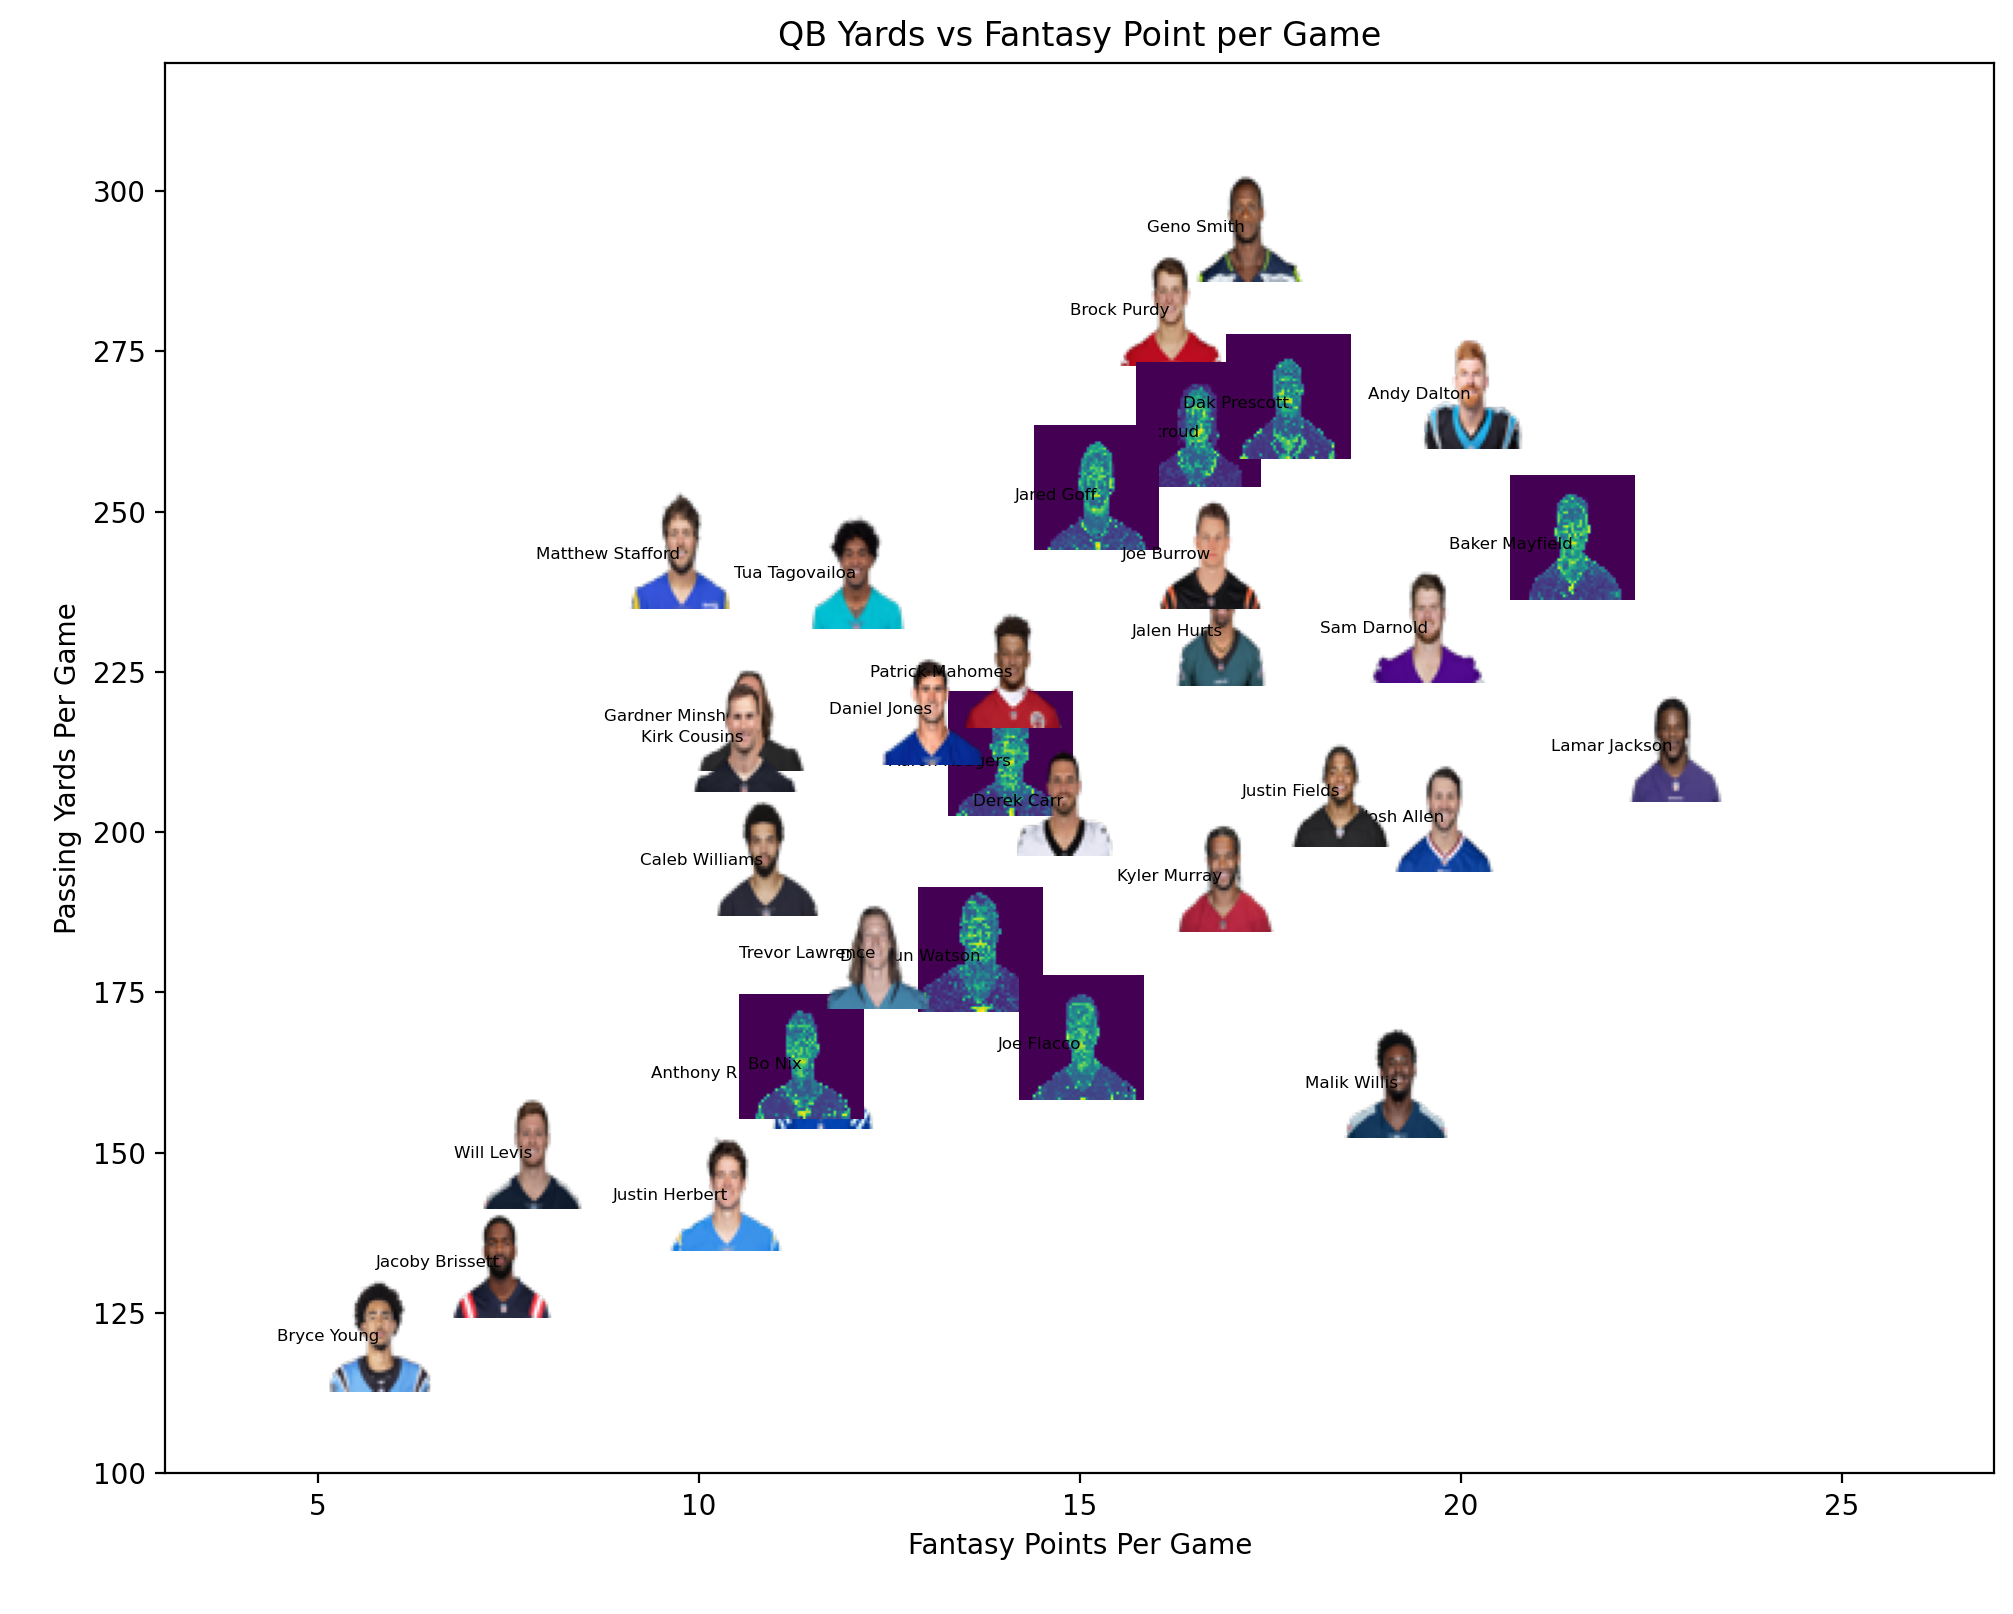

In [20]:
# Create a scatter plot with clearer images and player labels
fig, ax = plt.subplots(figsize=(10, 8), dpi=200)

for player_name, row in qb_df_hs.iterrows():
    x_value = row['fantasy_points']
    y_value = row['yards']
    image_url = row['headshot_url']

    # Check if the image URL is not blank
    if image_url:
        # Load and display the image from the URL
        image = Image.open(urllib.request.urlopen(image_url))
        image = image.resize((45, 45))  # Increase image size for clarity

        # Create an OffsetImage to place the image at the specified position
        img_offset = OffsetImage(image)
        img_ab = AnnotationBbox(img_offset, (x_value, y_value), frameon=False)
        ax.add_artist(img_ab)

        # Annotate the image with the player's name (which is the index)
        ax.annotate(player_name, (x_value, y_value), fontsize=6, ha='right', va='top')
# Set labels for x-axis and y-axis
ax.set_xlabel('Fantasy Points Per Game')
ax.set_ylabel('Passing Yards Per Game')

# Set a title for the chart
ax.set_title('QB Yards vs Fantasy Point per Game')

# Adjust the limits for clarity
plt.ylim(100, 320)
plt.xlim(3, 27)
#save
plt.savefig('qb_chart.png') 

# Show the graph
plt.tight_layout()
plt.show()



In [21]:
# use qbr library to get qbr and merge with qb_df
new_columns_qbr = ['qbr_total', 'pts_added']
qbr_df = qbr[new_columns_qbr]

# Reset the index to turn it into a regular column
qb_mean_df.head()
# Merge the DataFrames on the common column (with different names)
merged_df_qb = qb_mean_df.merge(qbr_df, left_on='player_display_name', right_on='player_display_name')


merged_df_qb.head()

KeyError: 'player_display_name'

In [ ]:
# make a machine learning model df

fantasy_points_qbr = merged_df_qb.groupby("player_display_name").mean()['fantasy_points']
yards_mean_qbr = merged_df_qb.groupby("player_display_name").mean()['passing_yards']
tds_mean_qbr = merged_df_qb.groupby("player_display_name").mean()['passing_tds']
passing_epa = merged_df_qb.groupby("player_display_name").mean()['passing_epa']
qbr = merged_df_qb.groupby("player_display_name").mean()['qbr_total']
points_added = merged_df_qb.groupby("player_display_name").mean()['pts_added']
pacr = merged_df_qb.groupby("player_display_name").mean()['pacr']




adv_ml_df_mean = pd.DataFrame({
    "fantasy_points": fantasy_points_qbr,
    "yards": yards_mean_qbr,
    "passing_epa": passing_epa,
    "qbr": qbr,
    "tds":tds_mean_qbr,
    "points_added": points_added,
    "pacr": pacr
    
    
})

adv_ml_df_mean.head()

In [ ]:
# create ml 5 ks for average using advanced stats
qb_adv_df = get_clusters(5, adv_ml_df_mean)
qb_adv_df.head()

In [ ]:
# make .xlsx for Advanced
qb_adv_df.to_excel('qb_advanced.xlsx', index=True)

In [ ]:
# merge headshot url column 
qb_no_index = qb_df_hs.reset_index()
nc_qbr = ['headshot_url', 'yards','player_display_name']
qbr_df_two = qb_no_index[nc_qbr]

adv_df_qb_ml = qb_adv_df.merge(qbr_df_two, left_on='yards', right_on='yards')
adv_df_qb_ml.head()


In [ ]:
# Create a scatter plot with clearer images and player labels
fig, ax = plt.subplots(figsize=(10, 8), dpi=200)

for player_name, row in adv_df_qb_ml.iterrows():
    x_value = row['fantasy_points']
    y_value = row['qbr']
    image_url = row['headshot_url']

    # Check if the image URL is not blank
    if image_url:
        # Load and display the image from the URL
        image = Image.open(urllib.request.urlopen(image_url))
        image = image.resize((45, 45))  # Increase image size for clarity

        # Create an OffsetImage to place the image at the specified position
        img_offset = OffsetImage(image)
        img_ab = AnnotationBbox(img_offset, (x_value, y_value), frameon=False)
        ax.add_artist(img_ab)

        # Annotate the image with the player's name (which is the index)
        ax.annotate(player_name, (x_value, y_value), fontsize=6, ha='right', va='top')

# Set labels for x-axis and y-axis
ax.set_xlabel('Fantasy Points Per Game')
ax.set_ylabel('QBR')

# Set a title for the chart
ax.set_title('QBR vs Fantasy Point per Game')

# Adjust the limits for clarity
plt.ylim(-10, 100)
plt.xlim(0, 30)
#save
plt.savefig('qbr_chart.png') 

# Show the graph
plt.tight_layout()
plt.show()